<a href="https://colab.research.google.com/github/mbatalha-svc/CAPES_WebScraper/blob/main/ClassificarJogadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://www.gov.br/participamaisbrasil/blob/ver/12083?w=0&h=0" width = "200px"></center>

<h3><center>Universidade Federal do Maranhão - UFMA</center></h3>
<h3><center>Bacharelado em Ciência da Computação</center></h3>
<h3><center>Inteligência Artificial</center></h3>
<h3><center>Docente: Tiago Bonini Borchartt</center></h3>
<h3><center>Discente: Matheus Vasconcelos Batalha</center></h3>
<h3><center>São Luís</center></h3>
<h3><center>2022.1</center></h3>

<center><h3>Trabalho Final - Classificação de Jogadores</h3></center>

**<h4>1. Introdução</h4>**
<p>Esse notebook do Google Colab tem como intuito ser apresentado como relatório de implementação do trabalho final da cadeira de Inteligência Artificial.</p>
<p> O objetivo do trabalho era aplicar uma técnica de aprendizado de máquina selecionada previamente e apresentada em aula. Essa aplicação seria feita sobre um conjunto de dados disponibilizado pelo professor.</p>
<p> A técnica que esse trabalho ficou responsável por aplicar é o SVM (Support Vector Machine). Para tanto foi realizada a aplicação de uma implementação prévia do mesmo localizada na biblioteca scikit-learn da linguagem de programação Python.</p>
<p>O conjunto de dados que foi disponibilizado descreve características de jogadores de futebol e os classifica entre "Defensores" e "Atacantes".</p>
<p>Ao aplicar o algorítmo de aprendizado nesse conjunto e construir um modelo, devemos aplicar o mesmo em outro conjunto de dados de jogadores não classificados previamente.</p>
<p>O desenvolvimento foi realizado na plataforma Google Colab, por ser capaz de comportar implementação em python e facilitar o processamento mesmo em máquinas de antiga geração.</p>
<p>Segue o desenvolvimento do projeto onde descrevo o raciocínio por trás das decisões de implementação do algorítmo de aprendizagem de máquina SVM.</p>

**<h4>2. Desenvolvimento</h4>**


<p>Inicialmente foi realizada a importação dos arquivos CSV (Comma Separated Values) para a plataforma do Google Colab.</p>
<p>Os mesmos foram então importados para um DataFrame utilizando a biblioteca pandas.</p>

In [ ]:
import pandas as pd

In [ ]:
jogadores = pd.read_csv("/content/jogadores.csv", sep = ";")

In [ ]:
jogadores.head(5)

,Id,Idade,Altura,Tecnica,Passe,Chute,Forca,Velocidade,Drible,Classe
0,1,17,177,72,65,72,60,84,81,Atacante
1,2,18,188,63,65,55,70,72,60,Defensor
2,3,18,190,63,65,67,70,72,66,Atacante
3,4,19,165,65,62,71,62,70,67,Atacante
4,5,19,174,67,66,69,64,76,74,Atacante


<p>Acima, uma amostra dos dados importados do arquivod e jogadores disponibilizados pelo professor.</p>

**<h5>2.1 Análise dos Dados</h5>**

<p>Nessa etapa do trabalho foi feita uma análise dos dados presentes no arquivo disponibilizado. Nessa análise objetivou-se adquirir conhecimento sobre os dados descritos e suas relações uns com os outros.</p>
<p>Para tanto, foram utilizados métodos próprios dos DataFrames da biblioteca pandas, além do plot em pares da biblioteca seaborn</p>

In [ ]:
jogadores.columns

Index(['Id', 'Idade', 'Altura', 'Tecnica', 'Passe', 'Chute', 'Forca',
       'Velocidade', 'Drible', 'Classe'],
      dtype='object')

In [ ]:
jogadores.describe()

,Id,Idade,Altura,Tecnica,Passe,Chute,Forca,Velocidade,Drible
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,25.683333,182.508333,70.775000,67.116667,63.341667,75.041667,74.483333,69.158333
std,34.785054,4.916074,7.390655,4.318151,4.189188,10.596096,8.016156,6.428643,7.488923
min,1.000000,17.000000,165.000000,62.000000,59.000000,45.000000,60.000000,60.000000,53.000000
25%,30.750000,22.000000,177.000000,67.750000,64.750000,55.750000,70.000000,70.000000,63.000000
50%,60.500000,25.000000,184.000000,71.000000,66.000000,64.500000,76.000000,74.000000,68.000000
75%,90.250000,29.000000,188.000000,74.000000,69.000000,72.000000,82.000000,79.000000,74.000000
max,120.000000,38.000000,195.000000,81.000000,82.000000,87.000000,91.000000,94.000000,90.000000


Informação importante que pode-se tirar da descrição dos dados é que o maior desvio padrão entre os valores é o pertecente a coluna de "Chute", sendo 10.596096.

In [ ]:
import seaborn as sns

In [ ]:
pplotjog = sns.pairplot(jogadores, hue="Classe",vars=['Idade', 'Altura', 'Tecnica', 'Passe', 'Chute', 'Forca',
       'Velocidade', 'Drible'])

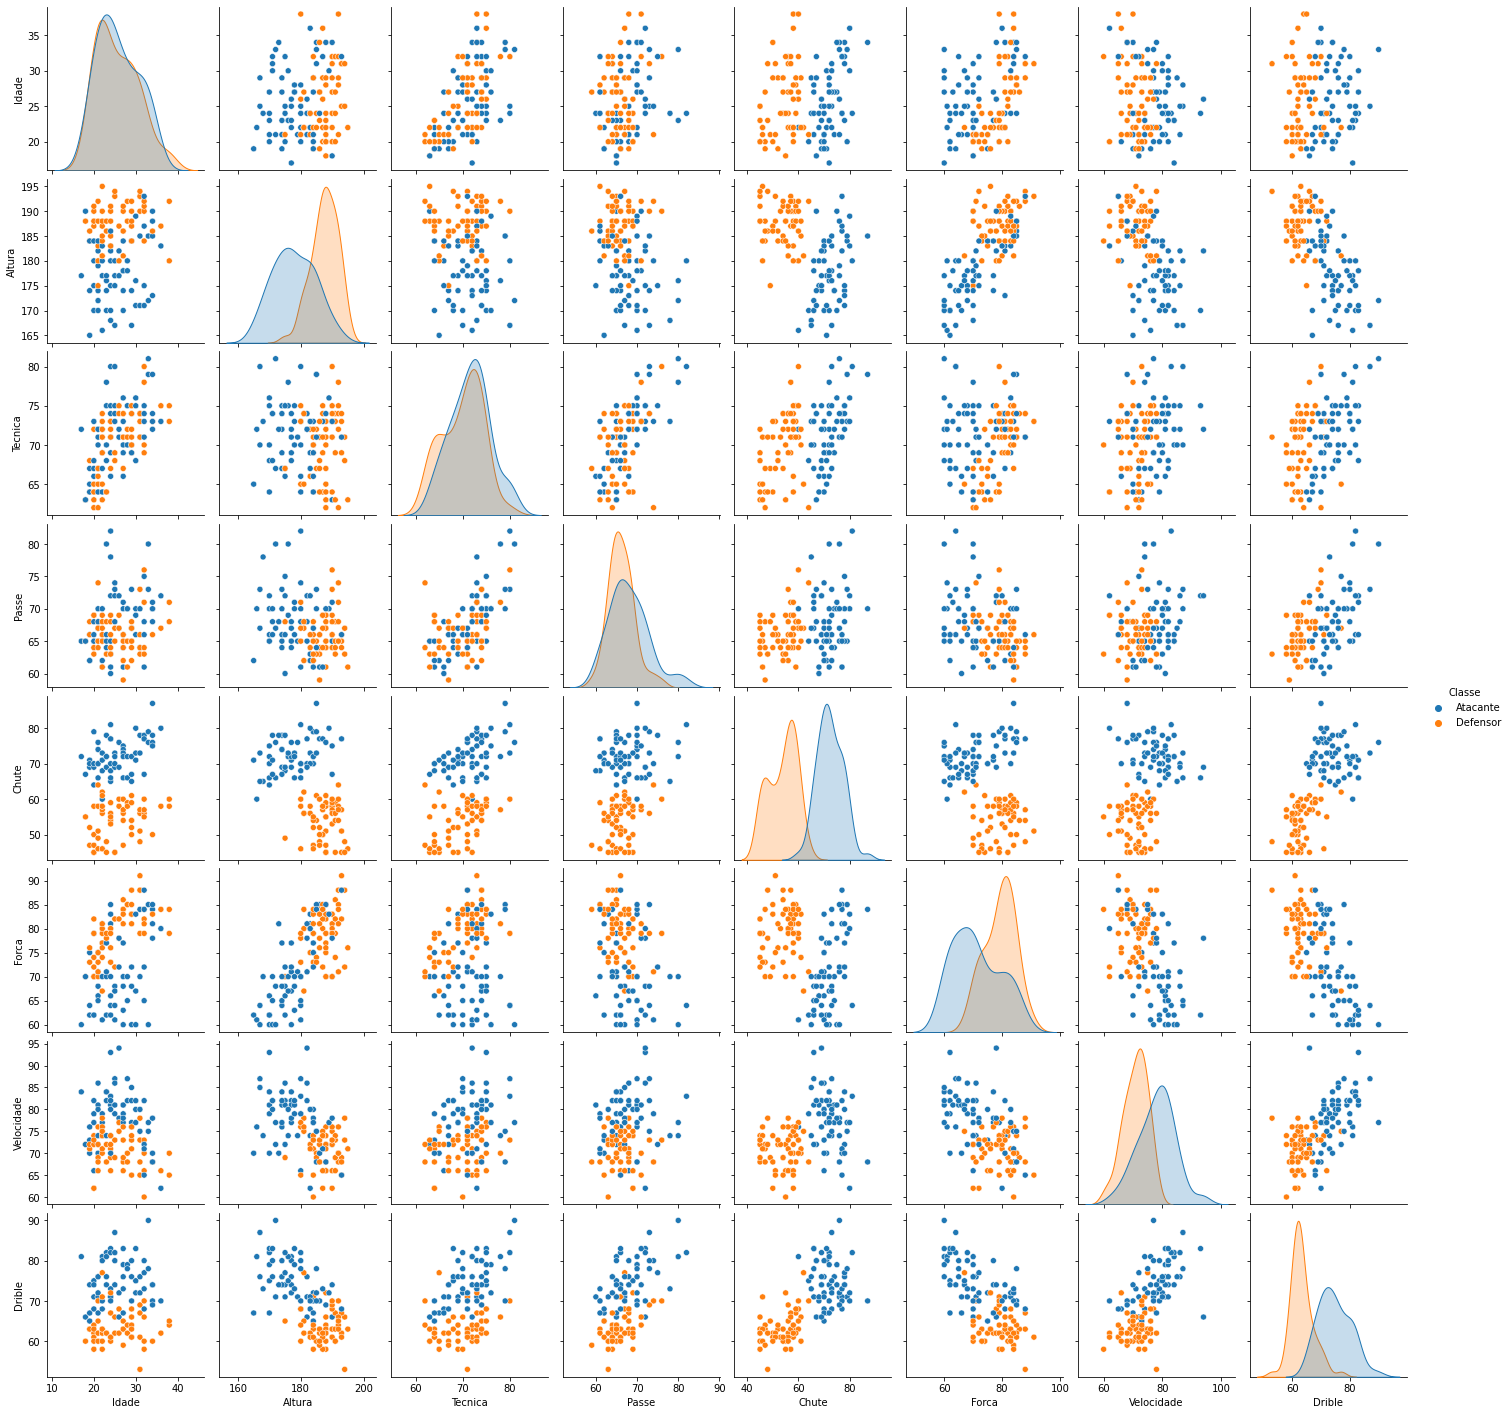

<p>Ao analisar os plots em pares dos dados, vemos que a distribução dos valores entre as duas classes apontadas possui uma intercessão visivelmente menor em relação a característica "Chute".</p>
<p>A  mesma característica também possui a melhor separação na disposição dos dados em conjunto com todos as outras. Isso é importante uma vez que o algorítmo de aprendizado de máquina a ser aplicado se utiliza da disposição dos dados em um espaço n-dimensional e o modelo que produz é a divisão do espaço n-dimensional de maneira a melhor demarcar os setores onde se encontram os exemplos já classificados. Dessa forma, quanto melhor delimitante for uma variável, mais importante ele se mostra para esse algorítmo.</p>

**<h5>2.2 Etapas de Treino e Teste Supervisionado</h5>**

<p>O treinamento e o teste foi feito utilizando a biblioteca scikit-learn.
<p>Implementei a função getClassificador, que por razão de conveniência retorna uma lista com: o classificador, e o score (porcentagem de acerto com base na divisão de teste e treinamento realizado).
<p>Essa função recebe um DataFrame com os dados e uma Series com a classificação respectiva. Além disso ela recebe 2 variáveis de importância para o algorítmo SVM: o C, que define a "solidez" das margens (se permite ou não classificação errônea com o intuito de melhorar a classificação para dados estranhos aos de treinamento) e o kernel, o qual define a função de transformação espacial dos dados de maneira a permitir encontrar a melhor maneira de separá-los através de um aumento de dimensão e aplicação de equações aos mesmo (as aceitas pela implementação do SVM do scikit-learn são "linear", "poly" e "rbf").
<p>A divisão entre conjunto de treinamento e teste foi realizada de maneira aleatória através de uma função presente na biblioteca scikit-learn. Foi utilizado a separação de 70% para treinamento e 30% para o teste.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
def getClassificador(dados, classes, c, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)
  clf = svm.SVC(C=c, kernel = k)
  
  result = []

  result.append(clf.fit(X_train, y_train))
  result.append(clf.score(X_test, y_test))
  return result

<p> Foi realizado vários conjuntos de treinamento e respectivos testes com base da divisão dos conjuntos de características dos jogadores utilizadas e com base no kernel utilizado pelo algorítmo.

######>treino com cada coluna individualmente - linear

In [ ]:
for coluna in jogadores.columns:
  if coluna != "Classe":
    X = jogadores[[coluna]]
    y = jogadores['Classe']
    classificadorjog = getClassificador(X, y, 1, "linear")
    print(f"{coluna}:  {classificadorjog[1]}")

Id:  0.4166666666666667
Idade:  0.4166666666666667
Altura:  0.8333333333333334
Tecnica:  0.5555555555555556
Passe:  0.6666666666666666
Chute:  0.9722222222222222
Forca:  0.7777777777777778
Velocidade:  0.8055555555555556
Drible:  0.9444444444444444


######>treino com cada coluna individualmente - poly

In [ ]:
for coluna in jogadores.columns:
  if coluna != "Classe":
    X = jogadores[[coluna]]
    y = jogadores['Classe']
    classificadorjog = getClassificador(X, y, 1, "poly")
    print(f"{coluna}:  {classificadorjog[1]}")

Id:  0.4444444444444444
Idade:  0.4444444444444444
Altura:  0.8333333333333334
Tecnica:  0.5833333333333334
Passe:  0.6111111111111112
Chute:  0.9722222222222222
Forca:  0.75
Velocidade:  0.8333333333333334
Drible:  0.9444444444444444


######>treino com cada coluna individualmente - rbf

In [ ]:
for coluna in jogadores.columns:
  if coluna != "Classe":
    X = jogadores[[coluna]]
    y = jogadores['Classe']
    classificadorjog = getClassificador(X, y, 1, "rbf")
    print(f"{coluna}:  {classificadorjog[1]}")

Id:  0.3888888888888889
Idade:  0.4166666666666667
Altura:  0.8333333333333334
Tecnica:  0.6388888888888888
Passe:  0.6666666666666666
Chute:  0.9722222222222222
Forca:  0.7777777777777778
Velocidade:  0.8333333333333334
Drible:  0.9444444444444444


Vemos que dependendo das características de cada um dos dados o kernel utilizado faz diferença no score quando as características são tomadas individualmente.
<p>Concluímos que em todos os kerneis a caracterítica que alcançou maior score foi o "Chute", seguido do "Drible" e da "Altura". Entretanto nenhum alcançou o score máximo.

######>treino com todas as variáveis - linear

In [ ]:
X = jogadores[['Idade', 'Altura', 'Tecnica', 'Passe', 'Chute', 'Forca',
       'Velocidade', 'Drible']]
y = jogadores['Classe']
classificadorjog = getClassificador(X, y, 1, "linear")
print(f"Todas: {classificadorjog[1]}")

Todas: 0.9722222222222222


######>treino com todas as variáveis - poly

In [ ]:
X = jogadores[['Idade', 'Altura', 'Tecnica', 'Passe', 'Chute', 'Forca',
       'Velocidade', 'Drible']]
y = jogadores['Classe']
classificadorjog = getClassificador(X, y, 1, "poly")
print(f"Todas: {classificadorjog[1]}")

Todas: 1.0


######>treino com todas as variáveis - rbf

In [ ]:
X = jogadores[['Idade', 'Altura', 'Tecnica', 'Passe', 'Chute', 'Forca',
       'Velocidade', 'Drible']]
y = jogadores['Classe']
classificadorjog = getClassificador(X, y, 1, "rbf")
print(f"Todas: {classificadorjog[1]}")

Todas: 1.0


Vemos que ao utilizar todas as variáveis para o treinamento, caso o kernel utilizado seja o "linear" ele encontra o seu score máximo como sendo igual ao score mais alto entre as análises individuais.
<p> Pelas características dos dados e sua análise em conjunto, tanto o kernel "poly", quanto o "rbf" alcançam o score máximo.

######>treino com pares - linear

In [ ]:
X = jogadores[['Chute', 'Drible']]
y = jogadores['Classe']
classificadorjog = getClassificador(X, y, 1, "linear")
print(f"Par:  {classificadorjog[1]}")

Par:  0.9722222222222222


######>treino com pares - poly

In [ ]:
X = jogadores[['Chute', 'Drible']]
y = jogadores['Classe']
classificadorjog = getClassificador(X, y, 1, "poly")
print(f"Par:  {classificadorjog[1]}")

Par:  0.9722222222222222


######>treino com pares - rbf

In [ ]:
X = jogadores[['Chute', 'Drible']]
y = jogadores['Classe']
classificadorjog = getClassificador(X, y, 1, "rbf")
print(f"Par:  {classificadorjog[1]}")

Par:  1.0


Ao tomar apenas as 2 melhores aracterísticas quando analisadas individualmente e analisarmos elas em conjunto vemos que o único kernel que não encontra o score máximo com base no score individual de uma delas é o "rbf".
<p>Maior investigação levaria a concluir se alguma das outras características, complementaria melhor uma a outra de maneira a alcançar maior score em conjunto.

**<h5>2.3 Classificação das Instâncias Desconhecidas</h5>**

<p> A partir do classificador encontrado através do treinamento tomando-se como base as características "Chute" e "Drible", com kernel "rbf", foi predito as classificações ao conjunto de validação disponibilizado pelo professor.
<p> Segue a aplicação da predição.

In [ ]:
validacao = pd.read_csv("/content/validacao.csv", sep = ";")

In [ ]:
validacao.head(5)

,Id,Idade,Altura,Tecnica,Passe,Chute,Forca,Velocidade,Drible
0,201,19,186,71,67,52,77,75,65
1,202,19,175,65,63,66,60,82,70
2,203,20,181,64,64,67,70,67,68
3,204,20,170,69,66,70,62,76,75
4,205,21,176,66,61,68,65,75,72


In [ ]:
classes_valid = classificadorjog[0].predict(validacao[['Chute', 'Drible']])

In [ ]:
validacao['Classe'] = classes_valid

In [ ]:
validacao[["Id", 'Classe']]

,Id,Classe
0,201,Defensor
1,202,Atacante
2,203,Atacante
3,204,Atacante
4,205,Atacante
5,206,Atacante
6,207,Atacante
7,208,Defensor
8,209,Atacante
9,210,Atacante


**<h5>3. Conclusão</h5>**
<p> Com esse trabalho desenvolveu-se o conhecimento de aprendizado de máquina utilizando python, em específico a biblioteca scikit-learn e o algorítmo SVM, assim como as principais variáveis para sua aplicação, com destaque para os tipos de kernel.
<p> A investigação na simplificação do conjunto de dados utilizado para a construção do modelo, diminuindo o número de dimensões necessárias para o treinamento foi realizada, levando a conclusão da melhor característica entre os dados de jogadores para a classificação, o "Chute". Ao pareá-la com outra característica forte e utilizar-se o kernel "rbf" alcançou-se resultado equivalente ao treinamento com todas as características.
<p> Futura investigação sobre os kerneis e as características dos dados podem levar a melhor entendimento de como as duplas de características podem melhor interagir com o kernel utilizado.